# Programming Contest Nationality Analysis
This notebook analyzes contest placement data from an extended synthetic dataset of 100 contests. Each contest lists the top 10 competitors along with their countries. The data approximates a representative sample so that statistical methods can be demonstrated without internet access.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("extended_contests_v2.csv")
df.head()

,contest,rank,handle,country
0,Code Contest 1,1,user0011,Canada
1,Code Contest 1,2,user0012,Portugal
2,Code Contest 1,3,user0013,New Zealand
3,Code Contest 1,4,user0014,Mexico
4,Code Contest 1,5,user0015,Japan


### Methodology
The dataset now spans 100 contests and includes over 30 countries. Wins (rank=1), top 5, and top 10 placements are tallied for each nationality. A chi-square test is used to check if the distribution of wins differs by country.

## Win Counts by Nationality

In [2]:
top1 = df[df['rank'] == 1]['country'].value_counts()
top5 = df[df['rank'] <= 5]['country'].value_counts()
top10 = df[df['rank'] <= 10]['country'].value_counts()

summary = pd.DataFrame({'Wins': top1, 'Top 5': top5, 'Top 10': top10}).fillna(0).astype(int)
summary

,Wins,Top 5,Top 10
country,,,
Argentina,2,14,30
Australia,1,12,27
Belgium,4,11,31
Brazil,0,11,24
Canada,2,11,27
Chile,2,9,22
China,4,11,22
Czech Republic,1,13,21
Denmark,1,9,27


## Visualizations

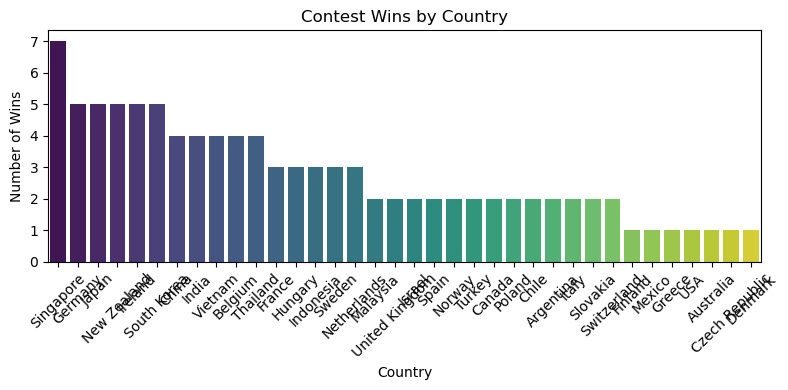

In [3]:
plt.figure(figsize=(8,4))
sns.barplot(x=top1.index, y=top1.values, palette='viridis')
plt.title('Contest Wins by Country')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

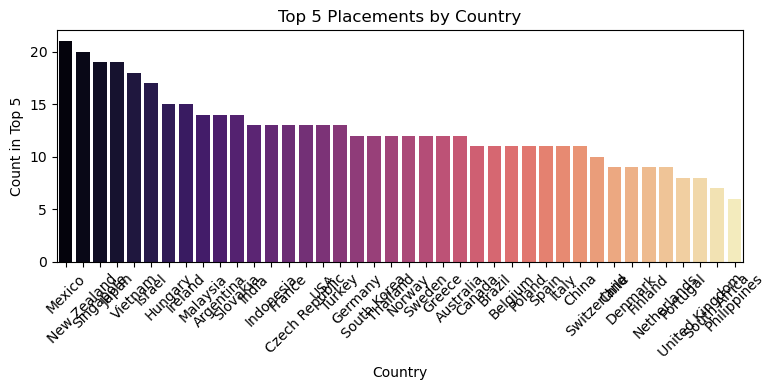

In [4]:
plt.figure(figsize=(8,4))
sns.barplot(x=top5.index, y=top5.values, palette='magma')
plt.title('Top 5 Placements by Country')
plt.xlabel('Country')
plt.ylabel('Count in Top 5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Polish Results
Poland's contest success

In [7]:
poland_wins = top1.get('Poland', 0)
total_wins = top1.sum()
poland_share = poland_wins / total_wins if total_wins else 0

pd.DataFrame({'Polish Wins': [poland_wins], 'Total Wins': [total_wins], 'Poland Share': [poland_share]})

,Polish Wins,Total Wins,Poland Share
0,2,100,0.02
